# Predicting Number of Orders using Multivariate Linear Regression

# Step 1: Importing essential Python Libraries

In [170]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 2: Reading Data and Attributes

In [171]:
dataset=pd.read_excel(r"C:\Users\Poornima Singh\Downloads\E Commerce Dataset.xlsx")

In [172]:
dataset.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


# Step 3: Treating missing values

In [173]:
# Treating missing data via Imputation - replacing the missing value with the mean of the non-missing values of 
#the selected field

In [174]:
dataset['Tenure'] = dataset['Tenure'].fillna(dataset['Tenure'].mean())
dataset['WarehouseToHome'] = dataset['WarehouseToHome'].fillna(dataset['WarehouseToHome'].mean())
dataset['HourSpendOnApp'] = dataset['HourSpendOnApp'].fillna(dataset['HourSpendOnApp'].mean())
dataset['NumberOfDeviceRegistered'] = dataset['NumberOfDeviceRegistered'].fillna(dataset['NumberOfDeviceRegistered'].mean())
dataset['SatisfactionScore'] = dataset['SatisfactionScore'].fillna(dataset['SatisfactionScore'].mean())
dataset['NumberOfAddress'] = dataset['NumberOfAddress'].fillna(dataset['NumberOfAddress'].mean())
dataset['Complain'] = dataset['Complain'].fillna(dataset['Complain'].mean())
dataset['OrderAmountHikeFromlastYear'] = dataset['OrderAmountHikeFromlastYear'].fillna(dataset['OrderAmountHikeFromlastYear'].mean())
dataset['CouponUsed'] = dataset['CouponUsed'].fillna(dataset['CouponUsed'].mean())
dataset['DaySinceLastOrder'] = dataset['DaySinceLastOrder'].fillna(dataset['DaySinceLastOrder'].mean())
dataset['CashbackAmount'] = dataset['CashbackAmount'].fillna(dataset['CashbackAmount'].mean())

In [175]:
dataset.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.000000,Computer,1,22.0,Debit Card,Female,3.000000,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,10.189899,Phone,3,11.0,Cash on Delivery,Male,2.000000,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,10.189899,Phone,1,6.0,CC,Male,3.000000,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.000000,Phone,3,9.0,E wallet,Male,2.931535,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,10.189899,Phone,1,31.0,Debit Card,Male,2.000000,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


# Step 4: Defining predictors (X) and response variable (Y) using relevant attributes

In [147]:
Y = dataset['OrderCount'].values
X = dataset.drop(['OrderCount', 'Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 
                  'PreferedOrderCat', 'MaritalStatus', 'Tenure', 'Complain', 'SatisfactionScore'], axis=1).values

In [148]:
print(X)

[[5.0001e+04 6.0000e+00 3.0000e+00 ... 1.0000e+00 5.0000e+00 1.5993e+02]
 [5.0002e+04 8.0000e+00 3.0000e+00 ... 0.0000e+00 0.0000e+00 1.2090e+02]
 [5.0003e+04 3.0000e+01 2.0000e+00 ... 0.0000e+00 3.0000e+00 1.2028e+02]
 ...
 [5.5628e+04 1.1000e+01 3.0000e+00 ... 1.0000e+00 4.0000e+00 1.8642e+02]
 [5.5629e+04 9.0000e+00 4.0000e+00 ... 2.0000e+00 9.0000e+00 1.7890e+02]
 [5.5630e+04 1.5000e+01 3.0000e+00 ... 2.0000e+00 3.0000e+00 1.6904e+02]]


In [149]:
print(Y)

[1. 1. 1. ... 2. 2. 2.]


# Step 5: Splitting Data into train and test data

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Step 6: Training the model

In [151]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Step 7: Predicting the response variable - OrderCount

In [152]:
Y_predict = model.predict(X_test)
print(Y_predict)

[0.75028537 1.28932613 4.13724017 ... 3.50047114 3.44831057 2.66038545]


# Step 8: Evaluating the model to see if the model can predict future orders which can
# further help e-commerce firms to optimizie the supply chain management

In [131]:
#Calculating R^2 score between the predicted value and the actual value to evaluate how accurate the model is

In [153]:
r2_score(Y_test, Y_predict)

0.5253250958530435

In [154]:
#R^2 is greater than 50% we can say our model is 52.53% effective

# Step 9: Printing values of the Response Variable

In [159]:
pred_Y = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': Y_predict, 'Difference': Y_test-Y_predict})
pred_Y[0:10]

,Actual Value,Predicted Value,Difference
0,1.000000,0.750285,0.249715
1,1.000000,1.289326,-0.289326
2,3.008004,4.137240,-1.129236
3,2.000000,1.725248,0.274752
4,3.000000,2.592766,0.407234
5,8.000000,4.371155,3.628845
6,1.000000,0.993483,0.006517
7,1.000000,2.222748,-1.222748
8,1.000000,2.459696,-1.459696
9,1.000000,0.840519,0.159481


In [164]:
pred_Y.describe()

,Actual Value,Predicted Value,Difference
count,1689.000000,1689.000000,1689.000000
mean,3.115249,3.019027,0.096222
std,2.989473,2.058528,2.057397
min,1.000000,-0.064206,-6.376588
25%,1.000000,1.676039,-0.885195
50%,2.000000,2.571828,-0.334638
75%,3.008004,3.679860,0.452335
max,16.000000,16.845125,12.820875


# Step 10: Visualize the Results

In [162]:
# Creating a Scatter Plot between Predicted Value and Actual Value

Text(0.5, 1.0, 'Actual vs. Predicted')

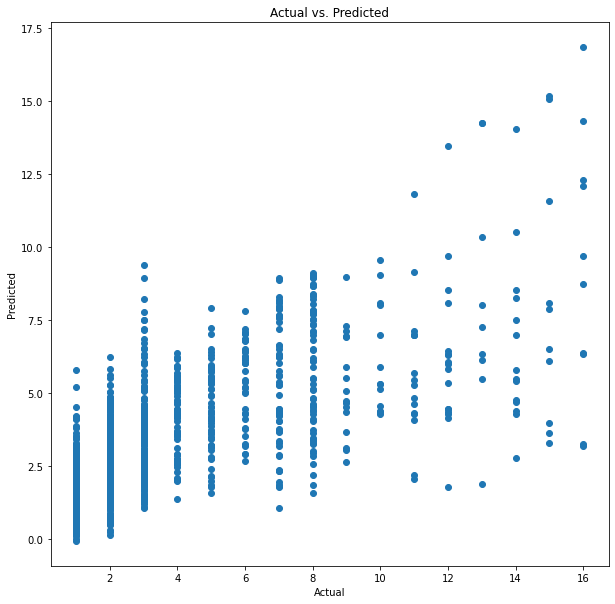

In [167]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')